In [1]:
pip install plot-likert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import plot_likert


In [3]:
import pandas as pd


In [4]:
import numpy as np


In [5]:
rng = np.random.default_rng(seed=42)


In [6]:
data = pd.DataFrame(rng.choice(plot_likert.scales.agree, (10,2)), columns=['Q1','Q2'])


/home/r/.local/lib/python3.10/site-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


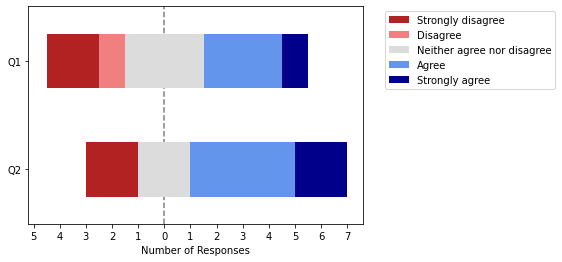

In [7]:
plot_likert.plot_likert(data, plot_likert.scales.agree);


In [8]:
data


,Q1,Q2
0,Strongly disagree,Agree
1,Agree,Neither agree nor disagree
2,Neither agree nor disagree,Strongly agree
3,Strongly disagree,Agree
4,Disagree,Strongly disagree
5,Neither agree nor disagree,Strongly agree
6,Agree,Agree
7,Agree,Agree
8,Neither agree nor disagree,Strongly disagree
9,Strongly agree,Neither agree nor disagree


In [9]:
df = pd.read_csv("survey.csv")


In [10]:
df2 = df.rename(columns={df.columns[8]: "x",df.columns[9]: "Q1", df.columns[10]: "Q2", df.columns[11]: "Q3", df.columns[12]: "Q4", df.columns[13]: "Q5", df.columns[14]: "Q6"})

In [11]:
subset = df2[["x","Q1","Q2","Q3","Q4","Q5","Q6"]]

In [12]:
mask = subset["x"] == "Sliders"
mask2 = subset["x"] == "Radar Chart"
df_slider = subset.loc[mask, ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]]
df_radar = subset.loc[mask2, ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]]


In [13]:
plot_likert.scales.agree[2]='Neutral'

In [14]:
plot_likert.scales.agree

['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

/home/r/.local/lib/python3.10/site-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
/home/r/.local/lib/python3.10/site-packages/plot_likert/plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


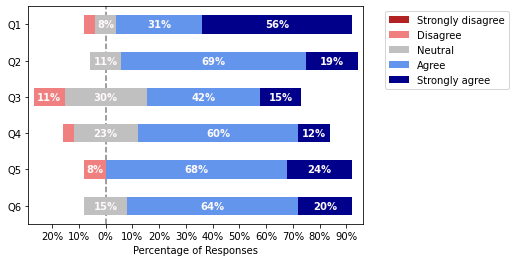

In [15]:
slider_plot=plot_likert.plot_likert(df_slider, plot_likert.scales.agree, plot_percentage=True,
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral);
     

/home/r/.local/lib/python3.10/site-packages/plot_likert/plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
/home/r/.local/lib/python3.10/site-packages/plot_likert/plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


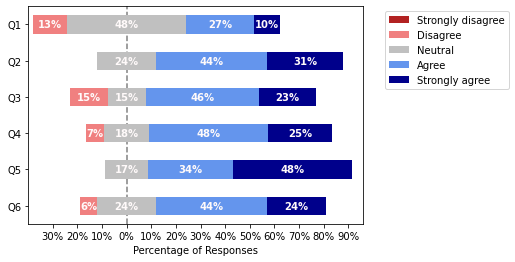

In [16]:
radar_plot=plot_likert.plot_likert(df_radar, plot_likert.scales.agree, plot_percentage=True,
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral);
     

In [17]:
plt.savefig("radar_plot.png")

NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.savefig("radar_plot.png")

In [ ]:
df_slider

In [18]:
from scipy.stats import rankdata

df_radar.dropna(inplace=True)
df_slider.dropna(inplace=True)


In [22]:
categoryToScore={'Strongly agree':5,'Agree':4,'Neutral':3,'Disagree':2,'Strongly disagree':1}
radar_num=df_radar.applymap(lambda x: categoryToScore[x])
slider_num=df_slider.applymap(lambda x: categoryToScore[x])
slider_num['Q1']

1     3
2     2
5     5
6     3
7     5
10    5
11    5
14    5
20    5
22    5
27    4
29    5
32    4
35    5
37    4
40    4
43    4
44    4
47    4
48    4
52    5
54    5
Name: Q1, dtype: int64

In [23]:
r_1_c=rankdata(radar_num['Q1'])
s_1_c=rankdata(slider_num['Q1'])

r_2_c=rankdata(radar_num['Q2'])
s_2_c=rankdata(slider_num['Q2'])

r_3_c=rankdata(radar_num['Q3'])
s_3_c=rankdata(slider_num['Q3'])

r_4_c=rankdata(radar_num['Q4'])
s_4_c=rankdata(slider_num['Q4'])

r_5_c=rankdata(radar_num['Q5'])
s_5_c=rankdata(slider_num['Q5'])

r_6_c=rankdata(radar_num['Q6'])
s_6_c=rankdata(slider_num['Q6'])

In [24]:
from scipy.stats import mannwhitneyu

In [30]:
u1,p1=mannwhitneyu(r_1_c,s_1_c, alternative='two-sided')
u2,p2=mannwhitneyu(r_2_c,s_2_c, alternative='two-sided')
u3,p3=mannwhitneyu(r_3_c,s_3_c, alternative='two-sided')
u4,p4=mannwhitneyu(r_4_c,s_4_c, alternative='two-sided')
u5,p5=mannwhitneyu(r_5_c,s_5_c, alternative='two-sided')
u6,p6=mannwhitneyu(r_6_c,s_6_c, alternative='two-sided')

In [32]:
u1,p1

(365.0, 0.02425526952725948)

In [33]:
u2,p2

(359.0, 0.03312190377421975)

In [34]:
u3,p3

(263.0, 0.9910901212945156)

In [35]:
u4,p4

(235.0, 0.5202779339982138)

In [36]:
u5,p5

(243.0, 0.6415439258601604)

In [37]:
u6,p6

(357.5, 0.035142840991921824)